<a href="https://colab.research.google.com/github/krishnapriya-atla/Bank-Marketing/blob/main/Banking_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Marketing**

https://archive.ics.uci.edu/ml/datasets/bank+marketing
### **Objective** To predict that  the client has subscribed for a term deposit or not? 

##**Attribute Information**:
####**Age** : **numerical column**- age in years <br>
####**Job** :Job of the customer. It is a **categorical** column having values. 
* **'entrepreneur'**     
* **'blue-collar'**
* **'management'**
* **'technician'**
* **'others'**
* **'retired'**
* **'admin.'**
* **'services'**
* **'self-employed'** 
* **'unemployed'**
* **'housemaid'**
* **'student'**<br>

####**Marital**:marital status of customer a **categorical column** having values 
* **'divorced'**     
* **'married'**
* **'single'**<br>

#####**Note:** '**divorced**' means divorced or widowed
####**Education**: education of customer a **categorical column** having values 
   
* **'tertiary'**     
* **'secondary'**
* **'others'**
* **'primary'**
<br>

####**Default**: **categorical** column- customer is having credit in default or not? 
* **'no'**
* **'yes'**

####**balance**: **numerical** column- how much balance left in client account
####**Housing**: **categorical** column Is customer having housing loan or not? 
* **'no'**
* **'yes'**

####**Loan**: **categorical** column Is customer having personal loan or not? 
* **'no'**
* **'yes'**

####**Contact**: **categorical** column. Contact number for communication  
* **'cellular'**
* **'telephone'**

####**Duration**: **numerical** column. Last contact duration of customer, time in seconds.

####**Campaign**: **numerical** column. Number of contacts performed during this campaign **includes last contact also**
####**Pdays**: **numerical** column. Number of days that passed by after the client was last contacted from a previous campaign 
#####**Note:** Pdays=0 means client was not previously contacted with us

####**Previous**: **numerical** column. Number of contacts performed before this campaign and for this client (numeric)
####**Poutcome**: **categorical** column. Outcome of the previous marketing campaign 
* **'failure'**
* **'nonexistent'**
* **'success'**

###**Target variable**:
####**y**: **categorical** column. we have to predict that  the client has subscribed for a term deposit or not? 
* **'yes'**
* **'no'**



###Downloading dataset into current working directory

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2022-04-09 18:06:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  2.23MB/s    in 0.2s    

2022-04-09 18:06:57 (2.23 MB/s) - ‘bank.zip’ saved [579043/579043]



###Unziping files 

In [2]:
!unzip 'bank.zip'

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


###Importing libraries to read and describe dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###Reading dataset

In [4]:
dataset = pd.read_csv('bank-full.csv', sep=r';',
                           header=0)

###Info of dataset

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


###Columns of dataset

In [6]:
print(dataset.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


###Describing numeric data type columns

In [7]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###Encoding labels to numbers

In [9]:
from sklearn.preprocessing import LabelEncoder
encoders={}
for col in dataset.columns:
    if dataset[col].dtype==np.object:
        encoders[col]=LabelEncoder()
        dataset[col]=encoders[col].fit_transform(dataset[col])
print(f"Label encoded columns are:  {list(encoders.keys())}")

Label encoded columns are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [10]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


###Splitting data 
#####Note: Splitting before feature scaling, data imputation and outlier removal to avoid data leakage and generalise model on unknown data


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.drop(columns=["y"]),dataset["y"],train_size=0.9,random_state=1)

In [12]:
print(f"No.of samples in train: {X_train.shape[0]}")
print(f"No.of samples in test: {len(X_test)}")

No.of samples in train: 40689
No.of samples in test: 4522


###Applying machine learning algorithm before preprocessing

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print(f"Accuracy of train set: {np.round(knn_clf.score(X_train,y_train)*100,decimals=2)}")
print(f"Accuracy of test set: {np.round(knn_clf.score(X_test,y_test)*100,decimals=2)}")

Accuracy of train set: 91.18
Accuracy of test set: 87.51


###Creating a column name list with numerical data of dataset

In [14]:
categorical_columns = set(encoders.keys())
all_columns = set(X_train.columns)
numerical_columns = list(all_columns.difference(categorical_columns))
print(f"All columns list is : {all_columns}")
print(f"Numerical column list is : {numerical_columns}")
print(f"Categorical column(before encoding) list is : {categorical_columns}")

All columns list is : {'job', 'contact', 'duration', 'pdays', 'marital', 'campaign', 'poutcome', 'education', 'loan', 'age', 'day', 'default', 'housing', 'previous', 'balance', 'month'}
Numerical column list is : ['duration', 'pdays', 'campaign', 'age', 'day', 'previous', 'balance']
Categorical column(before encoding) list is : {'job', 'contact', 'poutcome', 'marital', 'education', 'y', 'loan', 'default', 'housing', 'month'}


## **Preprocessing**


###Inspecting duplicates

In [15]:
print(f"Duplicates in train data: {X_train.duplicated().sum()}")
print(f"Duplicates in test data: {X_test.duplicated().sum()}")

Duplicates in train data: 0
Duplicates in test data: 0


####Outlier Detection for numerical columns using standard formula 
>**high oulier** = Q3 + (1.5)\*IQR <br>
>**lower oulier** = Q1 - (1.5)\*IQR <br>
> **IQR** = (Q3-Q1)

In [16]:
high_train = X_train[numerical_columns].quantile(q=0.75) + 1.5 * ( X_train[numerical_columns].quantile(q=0.75) - X_train[numerical_columns].quantile(q=0.25) )
low_train = X_train[numerical_columns].quantile(q=0.25) - 1.5 * ( X_train[numerical_columns].quantile(q=0.75) - X_train[numerical_columns].quantile(q=0.25) )
print("Train dataset: \n")
print(f"High Outliers\n{high_train}")
print(f"\nLow Outliers\n{low_train}")
high_test = X_test[numerical_columns].quantile(q=0.75) + 1.5 * ( X_test[numerical_columns].quantile(q=0.75) - X_test[numerical_columns].quantile(q=0.25) )
low_test = X_test[numerical_columns].quantile(q=0.25) - 1.5 * ( X_test[numerical_columns].quantile(q=0.75) - X_test[numerical_columns].quantile(q=0.25) )
print("Test dataset: \n")
print(f"High Outliers\n{high_test}")
print(f"\nLow Outliers\n{low_test}")

Train dataset: 

High Outliers
duration     640.5
pdays         -1.0
campaign       6.0
age           70.5
day           40.5
previous       0.0
balance     3453.0
dtype: float64

Low Outliers
duration    -219.5
pdays         -1.0
campaign      -2.0
age           10.5
day          -11.5
previous       0.0
balance    -1955.0
dtype: float64
Test dataset: 

High Outliers
duration     650.50
pdays         -1.00
campaign       6.00
age           73.00
day           39.00
previous       0.00
balance     3501.25
dtype: float64

Low Outliers
duration    -225.50
pdays         -1.00
campaign      -2.00
age            9.00
day           -9.00
previous       0.00
balance    -1994.75
dtype: float64


###Visualising outliers


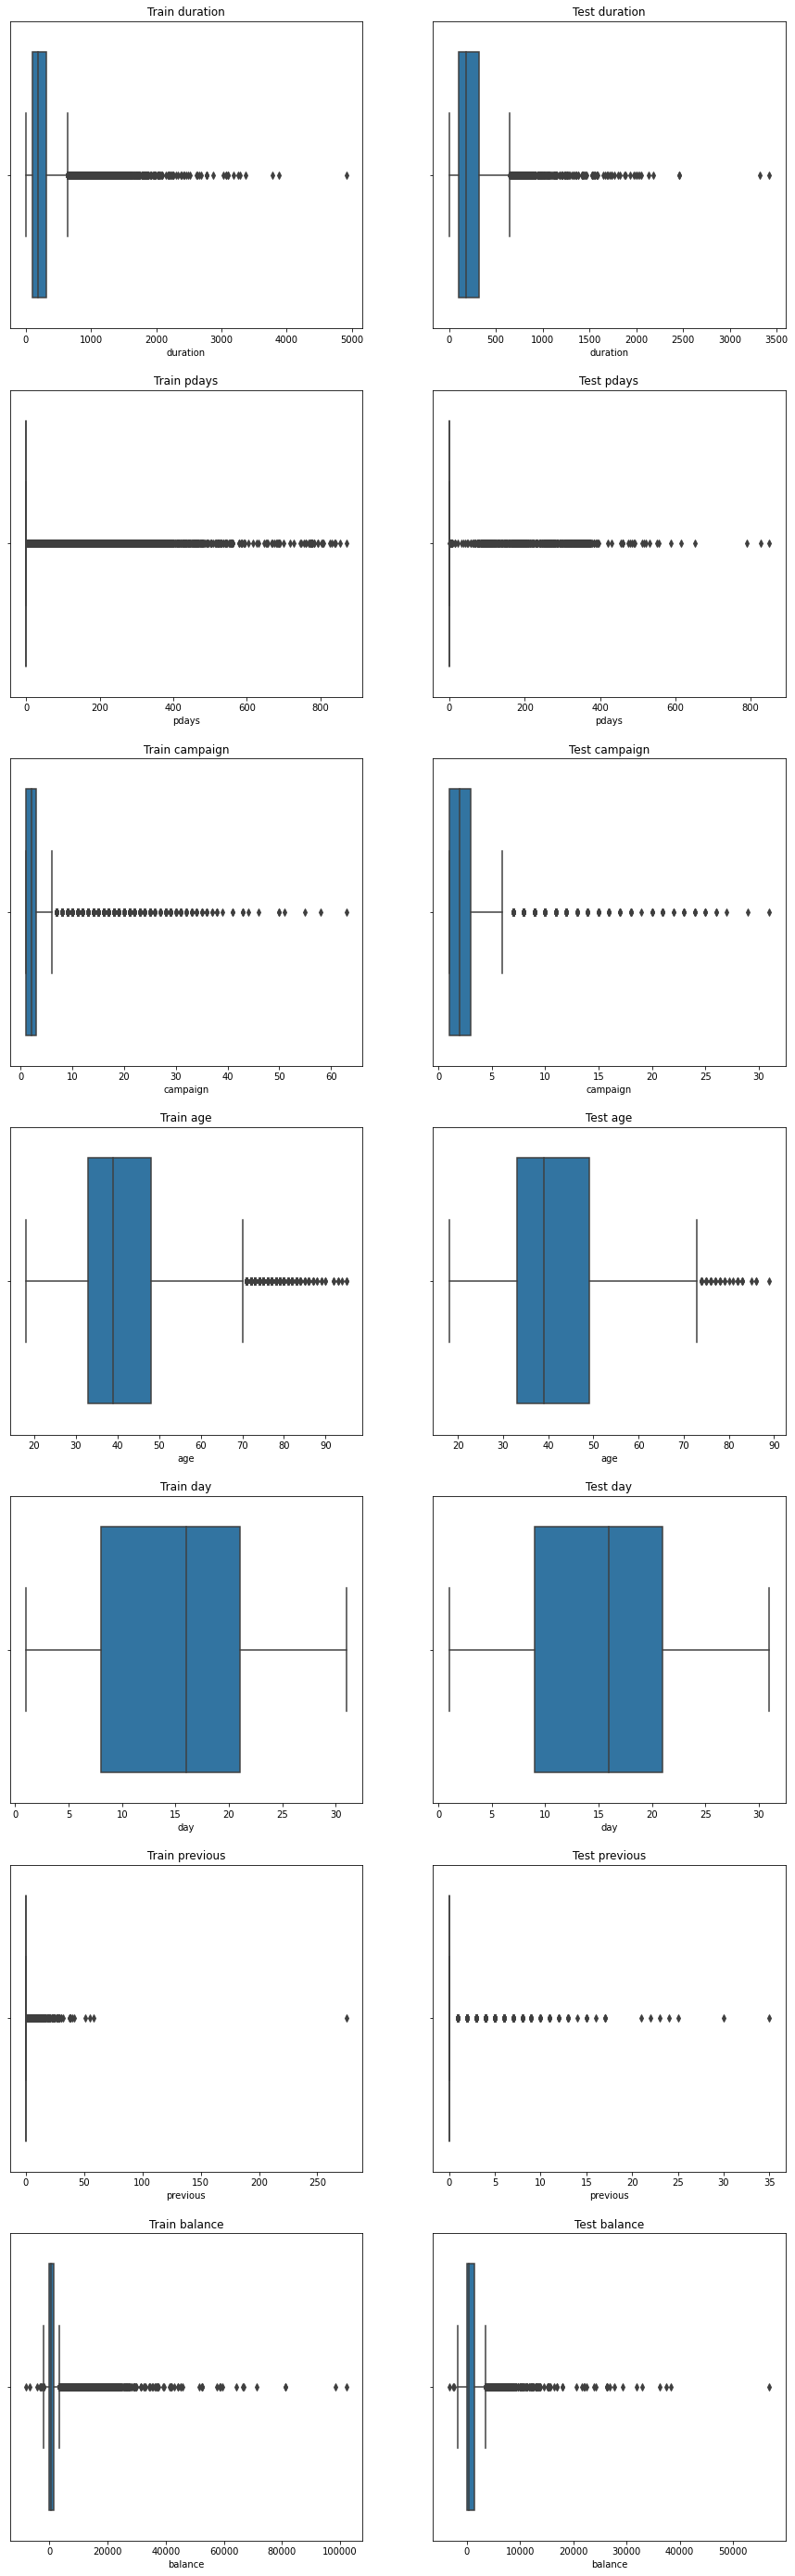

In [17]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,50))
for i in range(len(numerical_columns)):
    sns.boxplot(data=X_train,x=numerical_columns[i],ax=axes[i,0])
    axes[i,0].set_title("Train "+numerical_columns[i])
    sns.boxplot(data=X_test,x=numerical_columns[i],ax=axes[i,1])
    axes[i,1].set_title("Test "+numerical_columns[i])
plt.show()

###Removing Outlier


In [18]:
def remove_lows(features,i,high_outlier,low_outlier):
    features[i][features[i]<low_outlier[i]]=None
    features[i][features[i].isna()]=features[i].median(skipna=True)
    return features[i]
def remove_highs(features,i,high_outlier,low_outlier):
    features[i][features[i]>high_outlier[i]]=None
    features[i][features[i].isna()]=features[i].median(skipna=True)
    return features[i]
def remove_both(features,i,high_outlier,low_outlier):
    features[i][(features[i]>high_outlier[i])|(features[i]<low_outlier[i])]=None
    features[i][features[i].isna()]=features[i].median(skipna=True)
    return features[i]
def same(features,i,high_outlier,low_outlier):
    return features[i]
def outlier_remover(features,targets,high_outlier,low_outlier):
    best_process={0:same,1:remove_lows,2:remove_highs,3:remove_both}
    column_names=features.columns
    features_copy=features.copy()
    for i in column_names:
        #Storing the initial correlation and appending the correlation of outlier removal datasets
        correlations=[pd.DataFrame(features[i]).corrwith(targets)[0]]
        #removing lower outliers
        correlations.append(pd.DataFrame(best_process[1](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher outliers
        correlations.append(pd.DataFrame(best_process[2](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher and lower outliers
        correlations.append(pd.DataFrame(best_process[3](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #selecting best approac
        features[i]=best_process[np.abs(np.array(correlations)).argmax()](features,i,high_outlier,low_outlier)
    return features[column_names]

In [19]:
from itertools import compress 
#finding numerical columns where lower outlier is not equal to high outlier
test_outlier_col=list(compress(numerical_columns, (high_test!=low_test).to_list())) 
train_outlier_col=list(compress(numerical_columns, (high_train!=low_train).to_list())) 
#removing outliers in train set
X_train[train_outlier_col]=outlier_remover(X_train[train_outlier_col],y_train,high_train,low_train)
#removing outliers in test set
X_test[test_outlier_col]=outlier_remover(X_test[test_outlier_col],y_test,high_test,low_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

###Feature Scaling

In [20]:
X_train.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
42864,68,5,1,2,0,2812.0,0,0,0,3,3,279,2,181,1,0
29736,41,10,1,1,0,2423.0,1,0,0,4,3,101,1,-1,0,3
19403,53,9,1,1,0,1225.0,0,0,0,6,1,70,2,-1,0,3
12972,35,4,1,2,0,126.0,0,1,0,7,5,371,2,-1,0,3
41632,61,10,1,0,0,1.0,0,0,0,25,11,85,1,-1,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train[numerical_columns]=StandardScaler().fit_transform(X_train[numerical_columns])
X_test[numerical_columns]=StandardScaler().fit_transform(X_test[numerical_columns])

In [21]:
X_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
42864,68,5,1,2,0,2812.0,0,0,0,3,3,279,2,181,1,0
29736,41,10,1,1,0,2423.0,1,0,0,4,3,101,1,-1,0,3
19403,53,9,1,1,0,1225.0,0,0,0,6,1,70,2,-1,0,3
12972,35,4,1,2,0,126.0,0,1,0,7,5,371,2,-1,0,3
41632,61,10,1,0,0,1.0,0,0,0,25,11,85,1,-1,0,3


###Visualising the data distribution of numerical columns on train and test set

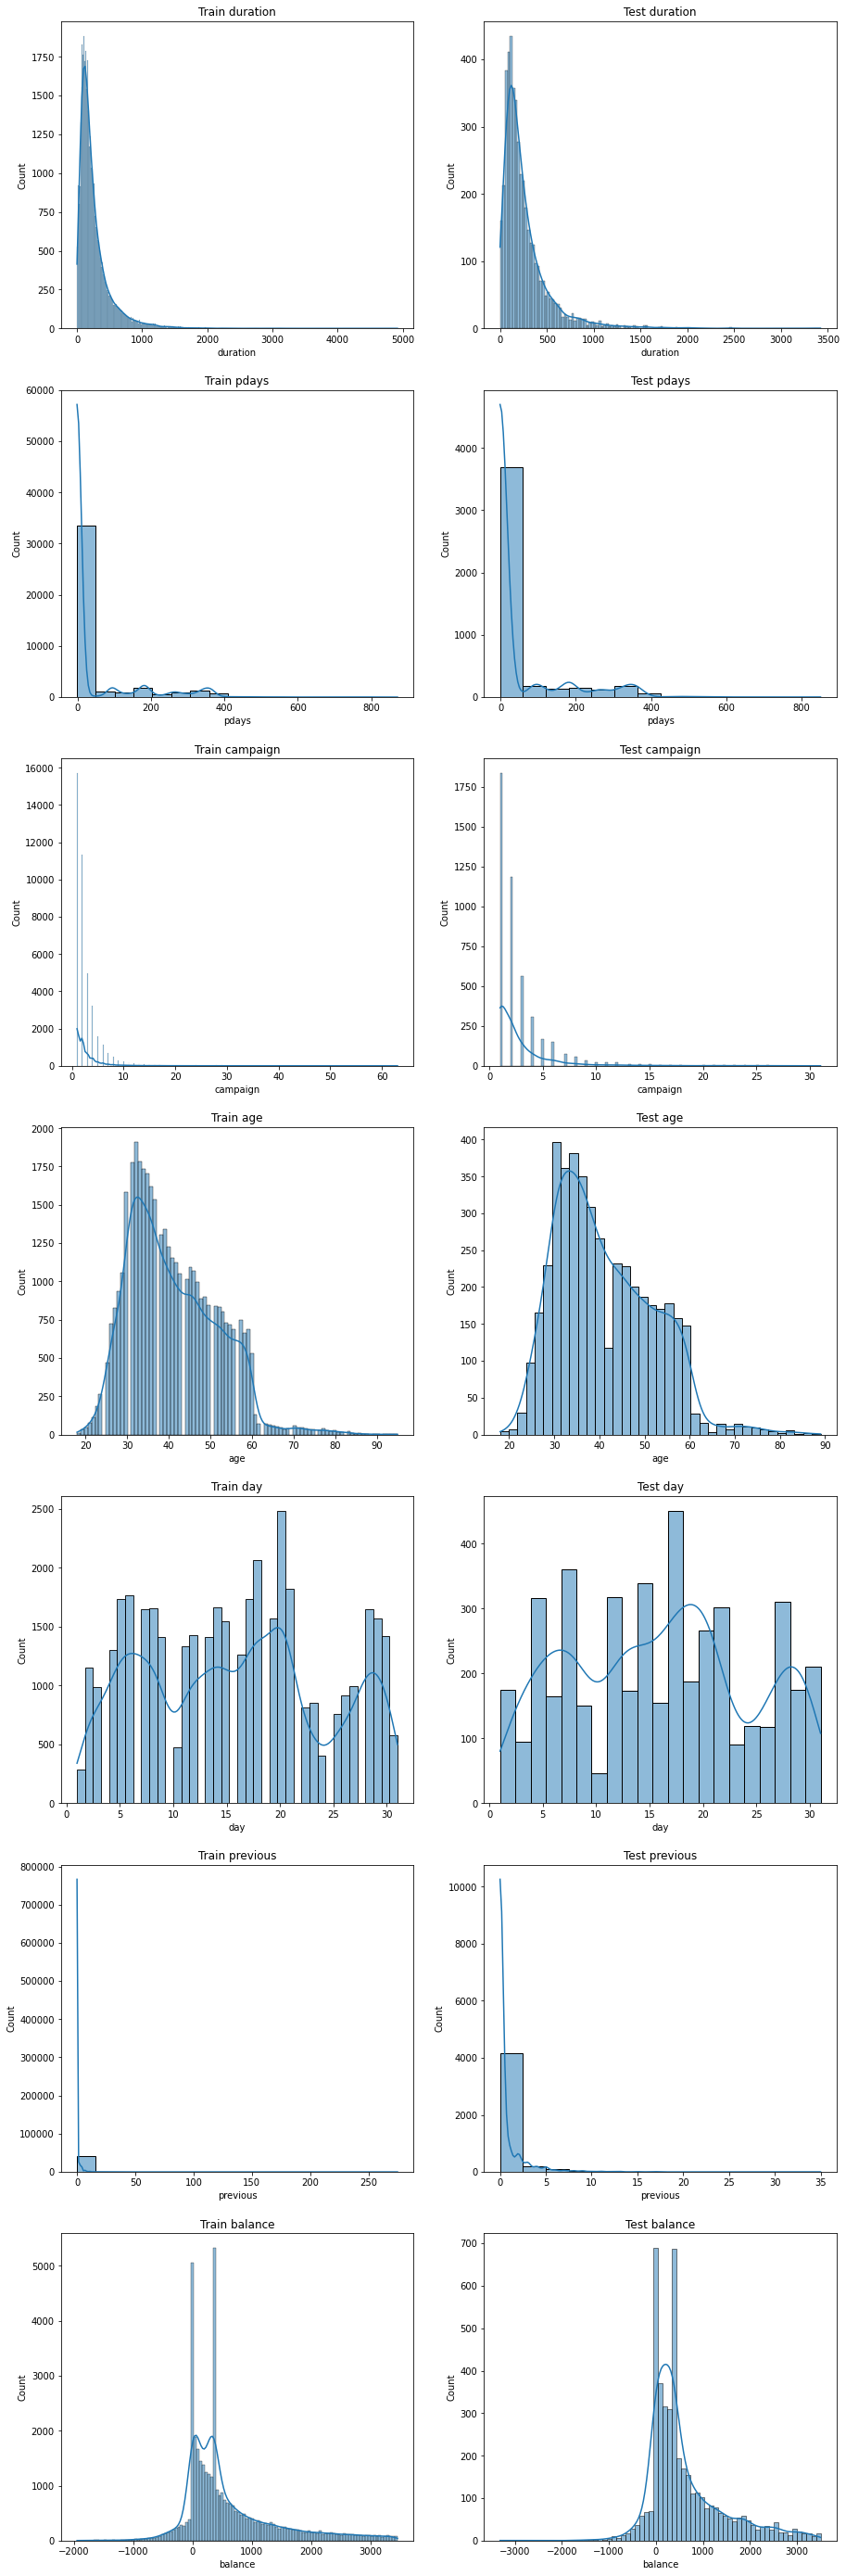

In [22]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,50))
for i in range(len(numerical_columns)):
    sns.histplot(data=X_train,x=numerical_columns[i],ax=axes[i,0],kde=True)
    axes[i,0].set_title("Train "+numerical_columns[i])
    sns.histplot(data=X_test,x=numerical_columns[i],ax=axes[i,1],kde=True)
    axes[i,1].set_title("Test "+numerical_columns[i])
plt.show()

###Measuring skewness

In [23]:
for i in numerical_columns:
    print(f"{i} column in train set skewness: {scipy.stats.skew(X_train[[i]])[0]}")
    print(f"{i} column in test set skewness: {scipy.stats.skew(X_test[[i]])[0]}")
    print("\n******************************************************************")

duration column in train set skewness: 3.124166861644669
duration column in test set skewness: 3.2943447915981694

******************************************************************
pdays column in train set skewness: 2.624700902346742
pdays column in test set skewness: 2.536598292738852

******************************************************************
campaign column in train set skewness: 4.992884483680003
campaign column in test set skewness: 3.7984814707819052

******************************************************************
age column in train set skewness: 0.6860582822813873
age column in test set skewness: 0.6730295298099054

******************************************************************
day column in train set skewness: 0.0969203283709489
day column in test set skewness: 0.05864767231070325

******************************************************************
previous column in train set skewness: 43.82379055134349
previous column in test set skewness: 6.641543394929162



###Non linear transformation on previous column to reduce skewness

In [24]:
X_train["previous"]=pd.DataFrame(np.cos(X_train["previous"]))
X_test["previous"]=pd.DataFrame(np.cos(X_test["previous"]))

In [25]:
for i in numerical_columns:
    print(f"{i} column in train set skewness: {scipy.stats.skew(X_train[[i]])[0]}")
    print(f"{i} column in test set skewness: {scipy.stats.skew(X_test[[i]])[0]}")
    print("\n******************************************************************")

duration column in train set skewness: 3.124166861644669
duration column in test set skewness: 3.2943447915981694

******************************************************************
pdays column in train set skewness: 2.624700902346742
pdays column in test set skewness: 2.536598292738852

******************************************************************
campaign column in train set skewness: 4.992884483680003
campaign column in test set skewness: 3.7984814707819052

******************************************************************
age column in train set skewness: 0.6860582822813873
age column in test set skewness: 0.6730295298099054

******************************************************************
day column in train set skewness: 0.0969203283709489
day column in test set skewness: 0.05864767231070325

******************************************************************
previous column in train set skewness: -2.579475169308948
previous column in test set skewness: -2.496705863572982

###Inspecting improvements in model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print(f"Accuracy of train set: {np.round(knn_clf.score(X_train,y_train)*100,decimals=2)}")
print(f"Accuracy of test set: {np.round(knn_clf.score(X_test,y_test)*100,decimals=2)}")

Accuracy of train set: 91.28
Accuracy of test set: 87.57


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
print(f"Accuracy of train set: {np.round(rf_clf.score(X_train,y_train)*100,decimals=2)}")
print(f"Accuracy of test set: {np.round(rf_clf.score(X_test,y_test)*100,decimals=2)}")

Accuracy of train set: 100.0
Accuracy of test set: 89.76


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
print(f"Accuracy of train set: {np.round(rf_clf.score(X_train,y_train)*100,decimals=2)}")
print(f"Accuracy of test set: {np.round(rf_clf.score(X_test,y_test)*100,decimals=2)}")

Accuracy of train set: 100.0
Accuracy of test set: 89.76


###Defining models

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models_name={
    "svm_clf":"SVC",
    "knn_clf":"KNeighborsClassifier",
    "rf_clf":"RandomForestClassifier",
    "ab_clf":"AdaBoostClassifier",
    "gb_clf":"GradientBoostingClassifier",
    "dt_clf":"DecisionTreeClassifier",
    "lr_clf":"LogisticRegression",
    
}

models={
    
    "knn_clf":KNeighborsClassifier(n_jobs=-1),
    "rf_clf":RandomForestClassifier(n_jobs=-1,random_state=1),
    "ab_clf":AdaBoostClassifier(random_state=1),
    "gb_clf":GradientBoostingClassifier(random_state=1),
    "dt_clf":DecisionTreeClassifier(random_state=1),
    "lr_clf":LogisticRegression(n_jobs=-1,random_state=1),
    "svm_clf":SVC(random_state=1)
    
}
model_params={
    "knn_clf":[{
        "n_neighbors":list(np.arange(3,16,2)),
        "p":[1,2],
    }],
    "rf_clf":[{
        "n_estimators":list(np.arange(100,701,100)),
        "max_features":["auto","log2"]
    }],
    "ab_clf":[{
        "base_estimator":[RandomForestClassifier(n_jobs=-1,random_state=1),
                          DecisionTreeClassifier(random_state=1)],
        "n_estimators":list(np.arange(100,701,100)),
        "learning_rate":[0.1,0.01,0.001],    
    }],
    "gb_clf":[{
        "loss":["deviance", "exponential"],
        "learning_rate":[0.1,0.01,0.001],
        "n_estimators":[600],

    }],
    "dt_clf":[{
        "criterion":['gini', 'entropy'],
    }],
    "lr_clf":[{
        "C":[0.1,1,10],
    }],
    "svm_clf":[{
        "C":[0.1,1,10],
        "kernel":["rbf","linear"]}],
}

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix,plot_roc_curve
metric=make_scorer(accuracy_score,greater_is_better=True)

In [31]:
best_models=[]

###Hyper parameter tuning of each models

In [ ]:
for i in models.keys():
    print(f"****************{models_name[i]}****************")
    grid=GridSearchCV(models[i],model_params[i],scoring=metric,return_train_score=True)
    grid.fit(X_train,y_train)
    print(f"Best parameters of {i} classifier: {grid.best_params_}")
    best_models.append(grid.best_estimator_)
    print(f"Train set accuracy:{np.round(grid.best_score_*100,decimals=2)} %")
    test_pred=grid.predict(X_test)
    print(f"Test set accuracy:{np.round(accuracy_score(y_true=y_test,y_pred=grid.predict(X_test))*100,decimals=2)} ")
    confusion_mat=confusion_matrix(y_true=y_test,y_pred=grid.predict(X_test))
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.heatmap(confusion_mat,annot=True,fmt='.4g',ax=ax[0])
    plot_roc_curve(grid.best_estimator_,X_test,y_test,ax=ax[1])
    ax[0].set_title('Confusion Matrix')
    ax[1].set_title('ROC AUC curve')
    plt.show()

###Deep learning (ANN)

In [34]:
import torch
from torch.utils.data import TensorDataset,DataLoader
from torch import nn
torch.manual_seed(0)

###Creating tensors

In [35]:
train_X=torch.from_numpy(X_train.copy().to_numpy())
train_y=torch.from_numpy(y_train.copy().to_numpy()).float()
test_X=torch.from_numpy(X_test.copy().to_numpy())
test_y=torch.from_numpy(y_test.copy().to_numpy()).float()

###Defining dataset

In [36]:
train_ds=TensorDataset(train_X,train_y)
valid_ds=TensorDataset(test_X,test_y)

###Defining data loader

In [37]:
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)
val_dl=DataLoader(valid_ds,batch_size=32,shuffle=True)

###Defning Neural Network Model 4 layers (2 hiddden layers)

In [38]:
import torch
from torch import nn
import sys
class ANN:
  def __init__(self,train_dl,val_dl,input,output):
    torch.manual_seed(0)
    self.model=nn.Sequential(
                                                  nn.Linear(input,10),
                                                  nn.ReLU(),
                                                  nn.Linear(10,6),
                                                  nn.ReLU(),
                                                  nn.Linear(6,4),
                                                  nn.ReLU(),
                                                  nn.Linear(4,output),
                                                ).cuda()
                                            
    self.model.double()      
    self.valid_outs=None                                      
    self.loss=torch.nn.CrossEntropyLoss()
    self.train_dl,self.val_dl=train_dl,val_dl
    self.track_train_loss,self.track_val_loss=[],[]
    self.track_val_acc=[]
  def get_val_pred(self):
    return self.valid_outs.detach().cpu().numpy()
  def loss_tracker(self):
    import matplotlib.pyplot as plt
    plt.plot(self.track_train_loss,'blue',label='Train Loss')
    plt.plot(self.track_val_loss,'orange',label='Valid Loss')
    plt.legend(loc=4)
    plt.show()
  def acc_tracker(self):
    import matplotlib.pyplot as plt
    plt.plot(self.track_val_acc,'orange',label='Valid Accuracy')
    plt.legend(loc=4)
    plt.show()
  def eval(self,dl):
    loss=torch.nn.CrossEntropyLoss()
    model_pred=torch.tensor([])
    model_loss=0
    model_true=torch.tensor([])
    for i,(xb,yb) in enumerate(dl):
      yhat=self.model(xb.cuda())
      _,pred=torch.max(yhat.cpu(),1)
      model_pred=torch.cat((model_pred,pred.view(-1).cpu()),0)
      model_true=torch.cat((model_true,yb.view(-1)),0)
      ls=self.loss(yhat,yb.cuda().long())
      model_loss+=ls.item()
      out=('No.of batches passed in evaluating: '+str(i)+' *&* Progress Percentage: '+str(np.round(i*100/len(dl),decimals=2))+'%')
      sys.stdout.write('\r'+out)
    self.valid_outs=model_pred
    return model_true,model_pred,model_loss/len(dl)
  def train(self,optim):
    model_loss=0
    for i,(xb,yb) in enumerate(train_dl):
      optim.zero_grad()
      yhat=self.model(xb.cuda())
      _,pred=torch.max(yhat,1)
      ls=self.loss(yhat,yb.cuda().long())
      model_loss+=ls.item()
      ls.backward()
      optim.step()
      out=('No.of batches passed in training: '+str(i)+' *&*  Progress Percentage: '+str(np.round(i*100/len(self.train_dl),decimals=2))+'%')
      sys.stdout.write('\r'+out)
    return np.round(model_loss/len(self.train_dl),decimals=8)
  def fit(self,epochs:int,optim,lr_rate=0.003):
    print("{:<8s}{:<14s}{:<14s}{:<14s}".format('Epoch','train_loss','val_loss','val_acc'))
    print("{:<8s}{:<14s}{:<14s}{:<14s}".format('-----','----------','--------','-------'))
    for epoch in range(epochs):
      train_ls=self.train(optim)
      y,yhat,ls=self.eval(self.val_dl)
      sys.stdout.write('\r')
      ls=np.round(ls,decimals=8)
      acc=np.round(((y==yhat).sum().numpy())/len(y),decimals=8)
      self.track_val_acc.append(acc)
      self.track_val_loss.append(ls)
      self.track_train_loss.append(train_ls)
      print("{:<8s}{:<14s}{:<14s}{:<14s}".format(str(epoch+1)+'/'+str(epochs),str(train_ls),str(ls),str(acc)))

In [39]:
network=ANN(train_dl,val_dl,len(X_train.columns),2)

In [40]:
network.fit(15,torch.optim.Adam(network.model.parameters()),lr_rate=0.005)

Epoch   train_loss    val_loss      val_acc       
-----   ----------    --------      -------       
1/15    0.36558643    0.29018077    0.88080495    
2/15    0.28138563    0.28479004    0.88102609    
3/15    0.27684384    0.27383697    0.88191066    
4/15    0.27002761    0.27064435    0.88301636    
5/15    0.26833606    0.27206735    0.88124724    
6/15    0.26583139    0.27158895    0.88080495    
7/15    0.2628928     0.26336617    0.88301636    
8/15    0.26045231    0.26078388    0.88567006    
9/15    0.25920444    0.26160758    0.88522778    
10/15   0.25905369    0.28347562    0.88567006    
11/15   0.25672459    0.28297236    0.88434321    
12/15   0.25536604    0.26313188    0.88456435    
13/15   0.25580941    0.25797618    0.88854489    
14/15   0.25271399    0.25620085    0.8869969     
15/15   0.25358904    0.25892357    0.88721805    


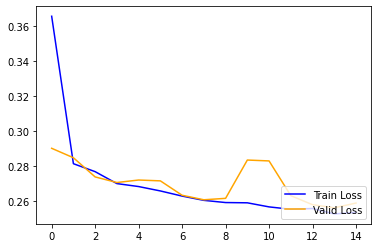

In [41]:
network.loss_tracker()

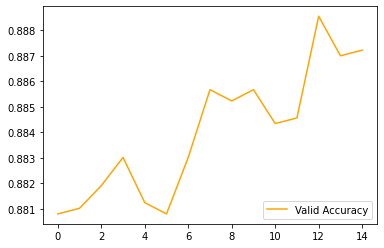

In [42]:
network.acc_tracker()